In [3]:
import numpy as np
import pandas as pd
import seaborn as sbn
import pickle as pkl
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,make_scorer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
from math import log


In [18]:
# with open("./data/train_data.pkl") as infile:
#     train_data = pkl.load(infile)

with open("./data/train/train_data.pkl") as infile:
    train_data = pkl.load(infile)


In [19]:
# train_data.columns.values

In [20]:
columns = ['date', 'B365H', 'B365D', 'B365A', 'match_id', 'home_team', 'away_team', 
           'winner', 'minute', 'H_Goal', 'A_Goal']
train_data = train_data[columns]

In [21]:
train_data.shape

(2585, 11)

In [36]:
# train_data.match_id.value_counts()

In [42]:
# train_data[(train_data['match_id']==1510566245714) & (train_data['minute']>=45)]

In [43]:
train_data.drop_duplicates(inplace=True, keep='first')

In [44]:
train_data.match_id.value_counts()

1510566245714    92
1510566355092    92
1510566397086    92
1510566303535    91
1510566351030    91
1510566400044    91
1510566347224    91
1510566339202    91
1510566394603    91
1510566363676    91
1510566212502    91
1510566280047    91
1510566372560    91
1510566429808    91
1510566215494    91
1510566336168    91
1510566411897    91
1510566231821    91
1510566283404    91
1510566228211    91
1510566271074    91
1510566426744    91
1510566285813    91
1510566300148    91
1510566218594    91
1510566405583    91
1510566241609    91
1510566277284    91
Name: match_id, dtype: int64

In [90]:
X = train_data.drop(['winner', 'date', 'match_id', 'home_team', 'away_team'], axis=1)
Y = train_data['winner']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [92]:
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
y_pred = clf.predict(X_test)

In [94]:
metrics.accuracy_score(y_test, y_pred)

0.76171875

In [164]:
y_prob = clf.predict_proba(X_test)

In [165]:
# for i, j, k, l in zip(X_test.values, y_test, y_pred, y_prob):
#     print i, j, k, l

## Evaluation Environment 

In [ ]:
y_prob = pd.DataFrame(y_prob, columns=[-1, 0, 1])

y_prob = y_prob.round(1)

y_prob['label'] = y_test.reset_index(drop=True)

### 1. Eval model for Home win

In [186]:
y_prob[1].value_counts()

vals = sorted(y_prob[1].unique())

y_col = []

for i in vals:
    tot_len = y_prob[(y_prob[1] == i)].shape[0]
    matching_len = y_prob[(y_prob[1] == i) & (y_prob['label'] == 1)].shape[0]
    y_col.append(matching_len*1.0/tot_len)
#     print i, matching_len*1.0/tot_len

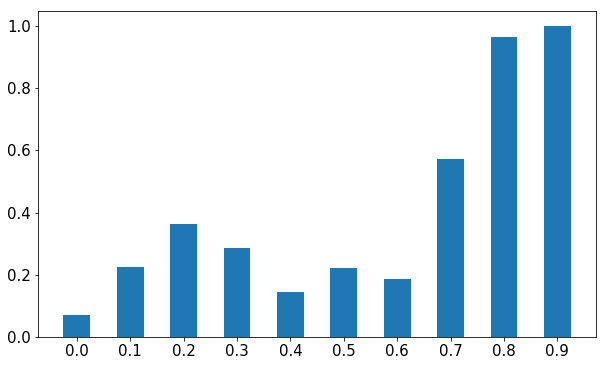

In [187]:
plt.figure(figsize=(10,6))
plt.bar(vals, y_col, width=0.05)
plt.xticks(np.arange(0.0, 1.0, 0.1), fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 2. Eval model for Away win

In [188]:
# y_prob[1].value_counts()
label = -1
vals = sorted(y_prob[label].unique())

y_col = []

for i in vals:
    tot_len = y_prob[(y_prob[label] == i)].shape[0]
    matching_len = y_prob[(y_prob[label] == i) & (y_prob['label'] == label)].shape[0]
    y_col.append(matching_len*1.0/tot_len)

# for i, j, in zip(vals, y_col):
#     print i, j


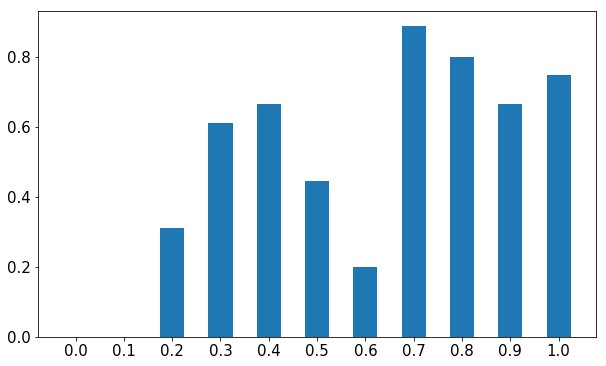

In [191]:
plt.figure(figsize=(10,6))
plt.bar(vals, y_col, width=0.05)
plt.xticks(np.arange(0.0, 1.1, 0.1), fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 3. Eval model for Draw

In [192]:
label = 0
vals = sorted(y_prob[label].unique())

y_col = []

for i in vals:
    tot_len = y_prob[(y_prob[label] == i)].shape[0]
    matching_len = y_prob[(y_prob[label] == i) & (y_prob['label'] == label)].shape[0]
    y_col.append(matching_len*1.0/tot_len)

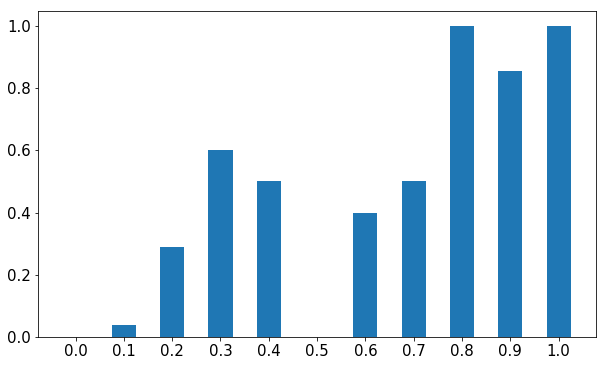

In [193]:
plt.figure(figsize=(10,6))
plt.bar(vals, y_col, width=0.05)
plt.xticks(np.arange(0.0, 1.1, 0.1), fontsize=15)
plt.yticks(fontsize=15)
plt.show()